In [3]:
# # Notebook de Classificação com Grid Search e Avaliação de Modelos

# ## 1. Importação das Bibliotecas Necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,RepeatedKFold,cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
file_prefix= "spam"

###  Lendos Dataset

In [18]:
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [19]:
columns = X.columns
X.columns = range(X.shape[1])
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [4]:
X.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
y.head(5)


,Class
0,1
1,1
2,1
3,1
4,1


### Pré-Processamento

In [6]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


<Axes: ylabel='Count'>

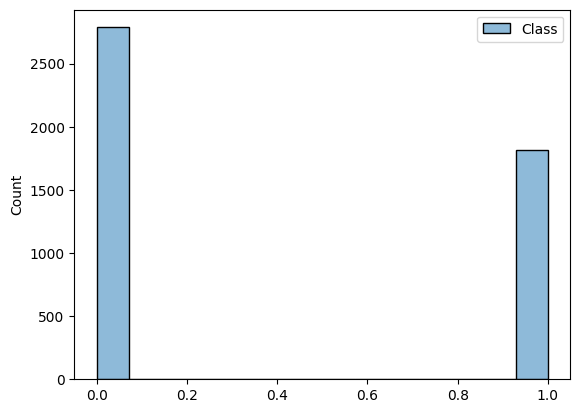

In [7]:
sns.histplot(y)

### Separando em treino  e teste

In [20]:

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Definindo os valores para o Grid Search

In [9]:

n_estimatores = [ i for i in range(10,121,20)]
max_depth = [4,6,8,10,None]
learning_rate = [round((1/(i)),5) for i in range(10,500,100)]

# ## 3. Definição dos Modelos e Parâmetros para Grid Search
# - Definir os parâmetros de busca para cada um dos modelos

# Definindo os parâmetros para cada modelo
param_grid_xgb = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimatores
}

param_grid_lgb = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimatores
}

param_grid_cat = {
    'learning_rate': learning_rate,
    'depth': max_depth,
    'iterations': n_estimatores
}

param_grid_gb = {
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'n_estimators': n_estimatores
}


In [10]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        total_time_seconds =(datetime.now() - start_time).total_seconds()
        thour, temp_sec = divmod(total_time_seconds, 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        return total_time_seconds
    

In [21]:

xgb = XGBClassifier(objective='binary:logistic', nthread=1)

# Aplicando Grid Search para cada modelo
print("Iniciando Grid Search para XGBoost...")
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb,cv=10,scoring="f1" 
                               #,verbose=3
                               )

tot_time = timer()
grid_search_xgb.fit(X_train,y_train)
time_grid_search_xgb = timer(tot_time)
print(time_grid_search_xgb)

print(f"best parameter:{grid_search_xgb.best_params_} - best score:{grid_search_xgb.best_score_}")

best_xgb = grid_search_xgb.best_params_


Iniciando Grid Search para XGBoost...

 Time taken: 0 hours 6 minutes and 51.67 seconds.
411.67038
best parameter:{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 110} - best score:0.9400098004724347


In [22]:

lgb =LGBMClassifier(objective="binary",n_jobs=1,verbose=0)

grid_search_lgb = GridSearchCV(lgb, param_grid_lgb,cv=10,scoring="f1"
                               #,verbose=3
                               )

tot_time = timer()
grid_search_lgb.fit(X_train,y_train)
time_grid_search_lgb = timer(tot_time)
print(time_grid_search_lgb)

print(f"best parameter:{grid_search_lgb.best_params_} - best score:{grid_search_lgb.best_score_}")

best_lgb = grid_search_lgb.best_params_


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [23]:


print("Iniciando Grid Search para CatBoost...")
cat =CatBoostClassifier(logging_level="Silent")

grid_search_cat = GridSearchCV(cat, param_grid_cat,cv=10,scoring="f1" 
                               #,verbose=3
                               )

tot_time = timer()
grid_search_cat.fit(X_train,y_train)
time_grid_search_cat = timer(tot_time)
print(time_grid_search_cat)

print(f"best parameter:{grid_search_cat.best_params_} - best score:{grid_search_cat.best_score_}")

best_cat = grid_search_cat.best_params_


Iniciando Grid Search para CatBoost...

 Time taken: 0 hours 22 minutes and 14.14 seconds.
1334.136063
best parameter:{'depth': 10, 'iterations': 90, 'learning_rate': 0.1} - best score:0.9373703806297151


In [24]:


print("Iniciando Grid Search para Gradient Boosting...")
gb =GradientBoostingClassifier()

grid_search_gb = GridSearchCV(gb, param_grid_gb,cv=10,scoring="f1"
                              #,verbose=3
                              )

tot_time = timer()
grid_search_gb.fit(X_train,y_train)
time_grid_search_gb = timer(tot_time)
print(time_grid_search_gb)

print(f"best parameter:{grid_search_gb.best_params_} - best score:{grid_search_gb.best_score_}")

best_gb = grid_search_gb.best_params_

Iniciando Grid Search para Gradient Boosting...

 Time taken: 0 hours 35 minutes and 43.09 seconds.
2143.085338
best parameter:{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 90} - best score:0.935936000423872


In [25]:
best_parameters =pd.DataFrame(index=["xgb","lgb","cat","gb"],data=[best_xgb,best_lgb,best_cat,best_gb])
best_parameters.to_csv(path_or_buf=f"best_parameters_{file_prefix}.csv",sep=",")



In [23]:
time_grid_search = best_parameters =pd.DataFrame(index=["xgb","lgb","cat","gb"],data=[time_grid_search_xgb,time_grid_search_lgb,time_grid_search_cat,time_grid_search_gb])
time_grid_search.to_csv(path_or_buf=f"time_{file_prefix}.csv",sep=",")


In [2]:
best_parameters =pd.read_csv("best_parameters_cancer.csv",sep=",",index_col=[0])
best_parameters["depth"] = best_parameters["depth"]
best_parameters["max_depth"] = best_parameters["max_depth"]
best_parameters["iterations"] = best_parameters["iterations"]
best_parameters["n_estimators"] = best_parameters["n_estimators"]


best_xgb= best_parameters.loc["xgb"].dropna().to_dict()
best_lgb= best_parameters.loc["lgb"].dropna().to_dict()
best_cat= best_parameters.loc["cat"].dropna().to_dict()
best_gb= best_parameters.loc["gb"].dropna().to_dict()

best_xgb= { k: int(v) if k != "learning_rate" else v for k, v in best_xgb.items() }
best_lgb= { k: int(v) if k != "learning_rate" else v for k, v in best_lgb.items() }
best_cat= { k: int(v) if k != "learning_rate" else v for k, v in best_cat.items() }
best_gb= { k: int(v) if k != "learning_rate" else v for k, v in best_gb.items() }




NameError: name 'pd' is not defined

In [27]:
xgb = XGBClassifier(objective='binary:logistic', **best_xgb)
xgb.fit(X_train,y_train)

lgb = LGBMClassifier(**best_lgb)
lgb.fit(X_train,y_train)

cat = CatBoostClassifier(**best_cat)
cat.fit(X_train,y_train)

gb = GradientBoostingClassifier(**best_gb)
gb.fit(X_train,y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.5797143	total: 12.4ms	remaining: 1.35s
1:	learn: 0.4907544	total: 15.8ms	remaining: 855ms
2:	learn: 0.4412752	total: 19.3ms	remaining: 687ms
3:	learn: 0.3885930	total: 23ms	remaining: 609ms
4:	learn: 0.3527915	total: 26.8ms	remaining: 563ms
5:	learn: 0.3218863	total: 30.5ms	remaining: 528ms
6:	learn: 0.2955175	total: 34ms	remaining: 501ms
7:	learn: 0.2762952	total: 37.5ms	remaining: 479ms
8:	learn: 0.2579614	total: 41.1ms	remaining: 462ms
9:	learn: 0.2463530	total: 44.6ms	remaining: 446ms
10:	learn: 0.2390323	total: 47.7ms	remaining: 430ms
11:	learn: 0.2307774	total: 51ms	remaining: 417ms
12:	learn: 0.2219209	total: 54.5ms	remaining: 407ms
13:	learn: 0.2158332	total: 58ms	remaining: 398ms
14:	learn: 0.2075863	total: 61.3ms	remaining: 388ms
15:	learn: 0.

GradientBoostingClassifier(max_depth=4, n_estimators=110)

In [28]:

# ## 5. Avaliação dos Modelos

# Função para avaliar os modelos
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return y_pred

# Avaliar cada modelo
print("Avaliação do melhor modelo XGBoost")
y_pred_xgb = evaluate_model(xgb, X_test, y_test)

print("Avaliação do melhor modelo LightGBM")
y_pred_lgb = evaluate_model(lgb, X_test, y_test)

print("Avaliação do melhor modelo CatBoost")
y_pred_cat = evaluate_model(cat, X_test, y_test)

print("Avaliação do melhor modelo Gradient Boosting")
y_pred_gb = evaluate_model(gb, X_test, y_test)


Avaliação do melhor modelo XGBoost
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       804
           1       0.95      0.92      0.93       577

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.95      0.95      0.95      1381

Avaliação do melhor modelo LightGBM
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       804
           1       0.95      0.94      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.96      0.96      1381
weighted avg       0.96      0.96      0.96      1381

Avaliação do melhor modelo CatBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.96      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.

In [29]:

# ## 6. Plotar a Matriz de Confusão do Melhor Modelo

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Plotando a Matriz de Confusão para XGBoost


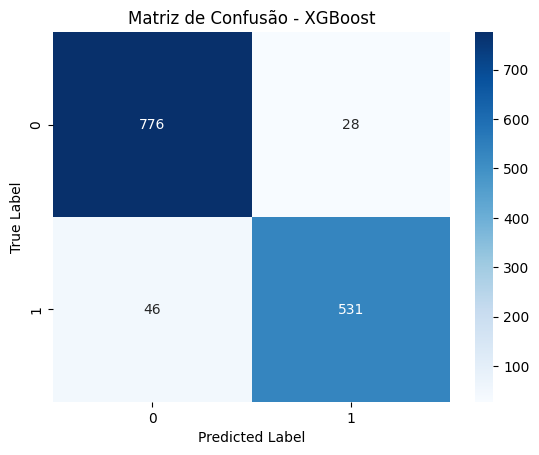

In [30]:

# Exemplo para o melhor modelo (substitua pelo modelo vencedor):
print("Plotando a Matriz de Confusão para XGBoost")
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')


Plotando a Matriz de Confusão para Lgb


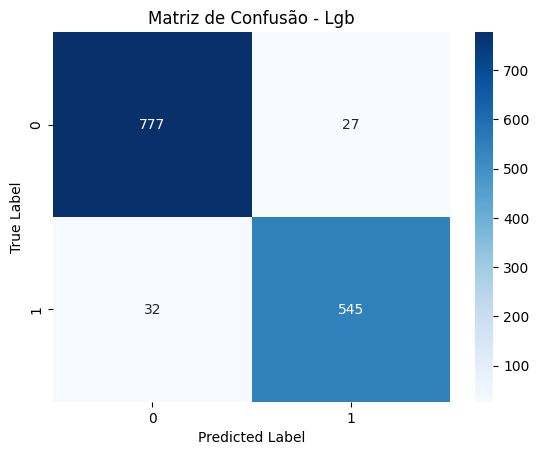

In [31]:
print("Plotando a Matriz de Confusão para Lgb")
plot_confusion_matrix(y_test, y_pred_lgb, 'Lgb')

Plotando a Matriz de Confusão para Cat


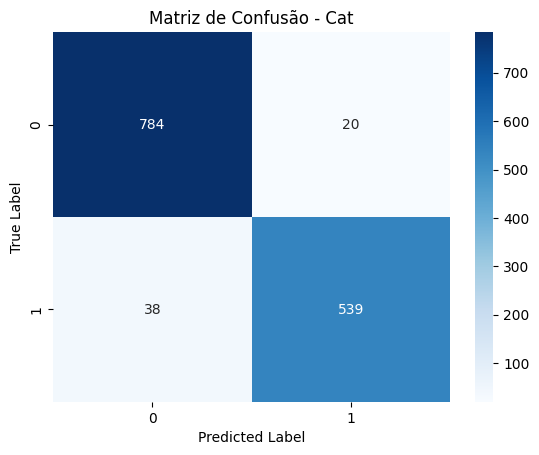

In [32]:
print("Plotando a Matriz de Confusão para Cat")
plot_confusion_matrix(y_test, y_pred_cat, 'Cat')

Plotando a Matriz de Confusão para GB


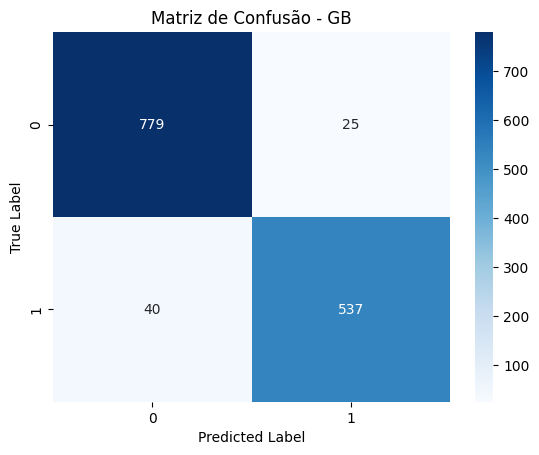

In [33]:
print("Plotando a Matriz de Confusão para GB")
plot_confusion_matrix(y_test, y_pred_gb, 'GB')

### Reapeated Kfold

In [42]:
cross_val_cancer_scores={}

XGBoost

In [43]:
model = XGBClassifier(objective='binary:logistic', **best_xgb)

cv =RepeatedKFold(n_repeats=10,n_splits=10)
scoring =["accuracy","f1","precision","recall","roc_auc"]

cross_val_cancer_scores["xgb"] =cross_validate(model,X,y,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

In [47]:
print("Média")
print(pd.DataFrame(cross_val_cancer_scores["xgb"]).mean(axis=0))
print()
print("Desvio Padrão")
print(pd.DataFrame(cross_val_cancer_scores["xgb"]).std(axis=0))


Média
fit_time          0.075817
score_time        0.036028
test_accuracy     0.944794
test_f1           0.928704
test_precision    0.942710
test_recall       0.915392
test_roc_auc      0.986000
dtype: float64

Desvio Padrão
fit_time          0.004382
score_time        0.002292
test_accuracy     0.011144
test_f1           0.015117
test_precision    0.018458
test_recall       0.019675
test_roc_auc      0.004949
dtype: float64


In [48]:
model = LGBMClassifier(**best_lgb)

cv =RepeatedKFold(n_repeats=10,n_splits=10)
scoring =["accuracy","f1","precision","recall","roc_auc"]

cross_val_cancer_scores["lgb"] =cross_validate(model,X,y,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [49]:
print("Média")
print(pd.DataFrame(cross_val_cancer_scores["lgb"]).mean(axis=0))
print()
print("Desvio Padrão")
print(pd.DataFrame(cross_val_cancer_scores["lgb"]).std(axis=0))

Média


TypeError: Could not convert [array([4.75230535, 4.80683153, 4.94834866, 4.78496097, 4.78556026,
        4.79492466, 4.87202152, 4.90696402, 4.87427149, 4.76813309,
        4.71977167, 4.85446319, 4.82835833, 4.79055026, 4.91213356,
        4.85870451, 4.8345937 , 4.87385378, 4.86055797, 4.70488453,
        4.86556908, 4.8079042 , 4.8565753 , 4.85539396, 4.78303217,
        4.8881177 , 4.82998134, 4.78759609, 4.80776759, 4.81040253,
        4.85015168, 4.80937356, 4.80346846, 4.84244791, 4.80596245,
        4.76551997, 4.8141805 , 4.85961009, 4.82023714, 4.87522366,
        4.86207697, 4.71165112, 4.82864369, 4.71184671, 4.91143208,
        4.874833  , 4.8356229 , 4.81744348, 4.83637041, 4.85764766,
        4.92040776, 4.7733052 , 4.82272058, 4.91185544, 4.68497683,
        4.82037027, 4.8724213 , 4.74642392, 4.83782288, 4.94404659,
        4.92234689, 4.90500941, 4.65896484, 4.83296669, 4.8211    ,
        4.80345018, 4.8958742 , 4.8333206 , 4.83579697, 4.81276759,
        4.82786709, 4.85334428, 4.91367646, 4.73749049, 4.80031775,
        4.86071435, 4.80984322, 4.86678013, 4.76547374, 4.81757245,
        4.77276011, 4.85676987, 4.92798256, 4.89640727, 4.81667642,
        4.73585547, 4.83211112, 4.78128942, 4.94057172, 4.82004838,
        4.90318509, 4.87214524, 4.67381444, 4.82247742, 4.8839268 ,
        4.87444744, 4.85881775, 4.87932854, 4.79945787, 4.76915172])
 array([5.12828075, 5.19889581, 5.29686856, 5.24650201, 5.26937102,
        5.27112874, 5.23647944, 5.2574639 , 5.25839947, 5.26966187,
        5.31514624, 5.22816323, 5.21159741, 5.26880262, 5.17893827,
        5.19526388, 5.18658944, 5.33324178, 5.18233927, 5.22862302,
        5.15135581, 5.28455259, 5.18848451, 5.28065672, 5.24720812,
        5.22739865, 5.17686009, 5.21382354, 5.30657706, 7.26959919,
        5.35680224, 5.19875966, 5.1701979 , 5.25030511, 5.30217539,
        5.21299904, 5.15088232, 5.20443241, 5.26532255, 5.23747693,
        5.20851   , 5.20726724, 5.25666223, 5.21113649, 5.26642926,
        5.28968154, 5.29673638, 5.20218779, 5.22438343, 5.15221473,
        5.32113523, 5.30899302, 5.15712271, 5.28274204, 5.21832906,
        5.13389668, 5.3460853 , 5.15250313, 5.23982167, 5.25063828,
        5.18756997, 5.16717311, 5.22705315, 5.20492048, 5.17118761,
        5.30390621, 5.29190928, 5.2504545 , 5.24420207, 5.22011193,
        5.16423627, 5.28299485, 5.191181  , 5.27195757, 5.28305059,
        5.31451668, 5.2081097 , 5.22237591, 5.17365818, 5.25093614,
        5.29836174, 5.26028625, 5.22454482, 5.27603353, 5.08185057,
        5.31176822, 5.25958748, 5.12636496, 5.2649443 , 5.33971887,
        5.16960134, 5.21956508, 5.2370327 , 5.27557057, 5.33267573,
        5.21284923, 5.21997916, 5.2379205 , 5.23146003, 5.23008323])
 array([4.8940672 , 4.80699145, 4.84997791, 4.85190825, 4.89798916,
        4.99133937, 4.76698205, 4.80836559, 4.88032437, 4.8782364 ,
        4.86968127, 4.74684708, 4.82374716, 4.90075345, 4.92688068,
        4.86851214, 4.83531722, 4.91006014, 4.85820061, 4.8401774 ,
        4.87750913, 4.85786388, 4.89596303, 4.75374325, 4.90128257,
        4.91638108, 4.8908684 , 4.87490387, 4.80641416, 4.8744526 ,
        4.84889968, 4.8340896 , 4.86917682, 4.88165896, 4.93689438,
        4.90523689, 4.92959599, 4.79732844, 4.81786921, 4.7952717 ,
        4.91460276, 4.89280013, 4.79909996, 4.88942641, 4.80047439,
        4.88224807, 4.90797057, 4.84957547, 4.78549096, 4.84221903,
        4.86421031, 4.85143614, 4.89496895, 4.89460324, 4.88109509,
        4.88725498, 4.79981833, 4.84903403, 4.92447447, 4.83198267,
        4.90285261, 4.84446684, 4.85550231, 4.95459876, 4.81291198,
        4.83201145, 4.84870165, 4.83536863, 4.84852841, 4.87331808,
        4.86042864, 4.82536201, 4.75282012, 4.81669358, 4.89910203,
        4.84909698, 4.87062536, 4.861685  , 4.8885128 , 4.95111318,
        4.84430619, 4.9805827 , 4.8911646 , 4.90007512, 4.85782865,
        4.73120905, 4.94582871, 4.86260547, 4.74761823, 4.89929034,
        4.82701203, 4.88850962, 4.86579631, 4.8372119 , 4.91558609,
        4.82558075, 4.89425273, 4.8658436 , 4.81226486, 4.94915438])] to numeric

In [45]:
model = CatBoostClassifier(**best_cat)

cv =RepeatedKFold(n_repeats=10,n_splits=10)
scoring =["accuracy","f1","precision","recall","roc_auc"]

cross_val_cancer_scores["cat"] =cross_validate(model,X,y,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

0:	learn: 0.5836758	total: 12.5ms	remaining: 1.36s
1:	learn: 0.4969215	total: 16.3ms	remaining: 883ms
2:	learn: 0.4288070	total: 19.6ms	remaining: 700ms
3:	learn: 0.3760787	total: 23.3ms	remaining: 618ms
4:	learn: 0.3363643	total: 27ms	remaining: 568ms
5:	learn: 0.3057942	total: 30.8ms	remaining: 534ms
6:	learn: 0.2852609	total: 34ms	remaining: 500ms
7:	learn: 0.2648731	total: 37.8ms	remaining: 482ms
8:	learn: 0.2531152	total: 41.7ms	remaining: 468ms
9:	learn: 0.2383113	total: 45ms	remaining: 450ms
10:	learn: 0.2292410	total: 48.3ms	remaining: 435ms
11:	learn: 0.2197229	total: 51.5ms	remaining: 421ms
12:	learn: 0.2105514	total: 55.7ms	remaining: 416ms
13:	learn: 0.2024122	total: 59.7ms	remaining: 409ms
14:	learn: 0.1962934	total: 63.4ms	remaining: 402ms
15:	learn: 0.1894813	total: 67.2ms	remaining: 395ms
16:	learn: 0.1841881	total: 71.2ms	remaining: 390ms
17:	learn: 0.1804769	total: 74.7ms	remaining: 382ms
18:	learn: 0.1756024	total: 78.2ms	remaining: 374ms
19:	learn: 0.1716669	total: 

In [51]:
print("Média")
print(pd.DataFrame(cross_val_cancer_scores["cat"]).mean(axis=0))
print()
print("Desvio Padrão")
print(pd.DataFrame(cross_val_cancer_scores["cat"]).std(axis=0))

Média
fit_time          0.476758
score_time        0.016354
test_accuracy     0.953684
test_f1           0.940568
test_precision    0.948099
test_recall       0.933425
test_roc_auc      0.987371
dtype: float64

Desvio Padrão
fit_time          0.200801
score_time        0.001077
test_accuracy     0.009768
test_f1           0.013208
test_precision    0.017385
test_recall       0.017404
test_roc_auc      0.004136
dtype: float64


In [52]:
model = GradientBoostingClassifier(**best_gb)

cv =RepeatedKFold(n_repeats=10,n_splits=10)
scoring =["accuracy","f1","precision","recall","roc_auc"]

cross_val_cancer_scores["gb"] =cross_validate(model,X,y,cv=cv,scoring=["accuracy","f1","precision","recall","roc_auc"])

In [53]:
print("Média")
print(pd.DataFrame(cross_val_cancer_scores["gb"]).mean(axis=0))
print()
print("Desvio Padrão")
print(pd.DataFrame(cross_val_cancer_scores["gb"]).std(axis=0))

Média
fit_time          1.625212
score_time        0.015494
test_accuracy     0.949923
test_f1           0.935544
test_precision    0.946374
test_recall       0.925341
test_roc_auc      0.986476
dtype: float64

Desvio Padrão
fit_time          0.031108
score_time        0.000732
test_accuracy     0.009015
test_f1           0.012297
test_precision    0.016821
test_recall       0.019563
test_roc_auc      0.003962
dtype: float64


In [1]:
pd.DataFrame(cross_val_cancer_scores).shape

NameError: name 'pd' is not defined